# Apply ML Clustering techniques on "Country-data.csv" dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
import warnings
warnings.filterwarnings("ignore") 

from sklearn.decomposition import PCA

In [3]:
country_df = pd.read_csv("Country-data.csv")

In [4]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country_df.shape

(167, 10)

In [7]:
print(round(100*(country_df.isnull().sum(axis=0)/len(country_df.index)),2))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


In [8]:
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [9]:
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [10]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
print(country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

       child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer          

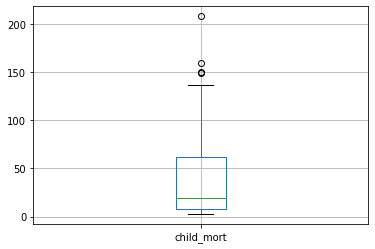

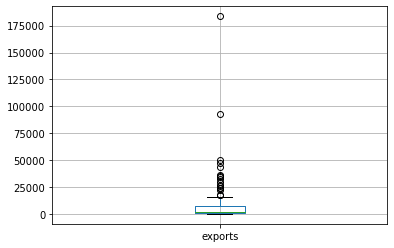

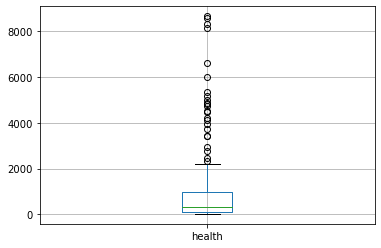

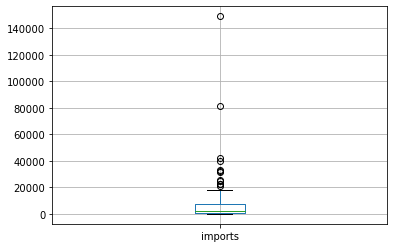

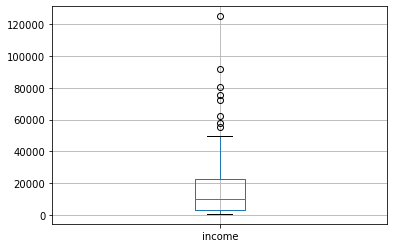

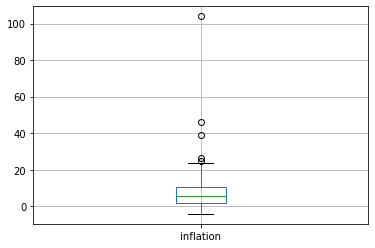

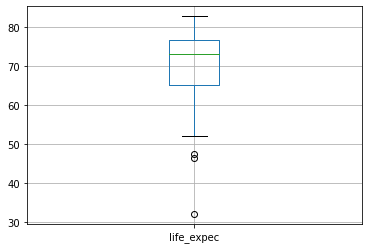

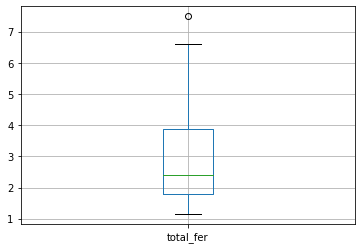

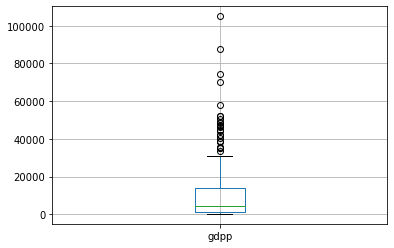

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = country_df.select_dtypes(include=numerics)
for column in numeric_df:
    plt.figure()
   # numeric_df.plot(kind='box')
    numeric_df.boxplot([column])

In [13]:
country_df_only = country_df['country']
country_df_only.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [14]:
numeric_df = country_df._get_numeric_data()
numeric_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


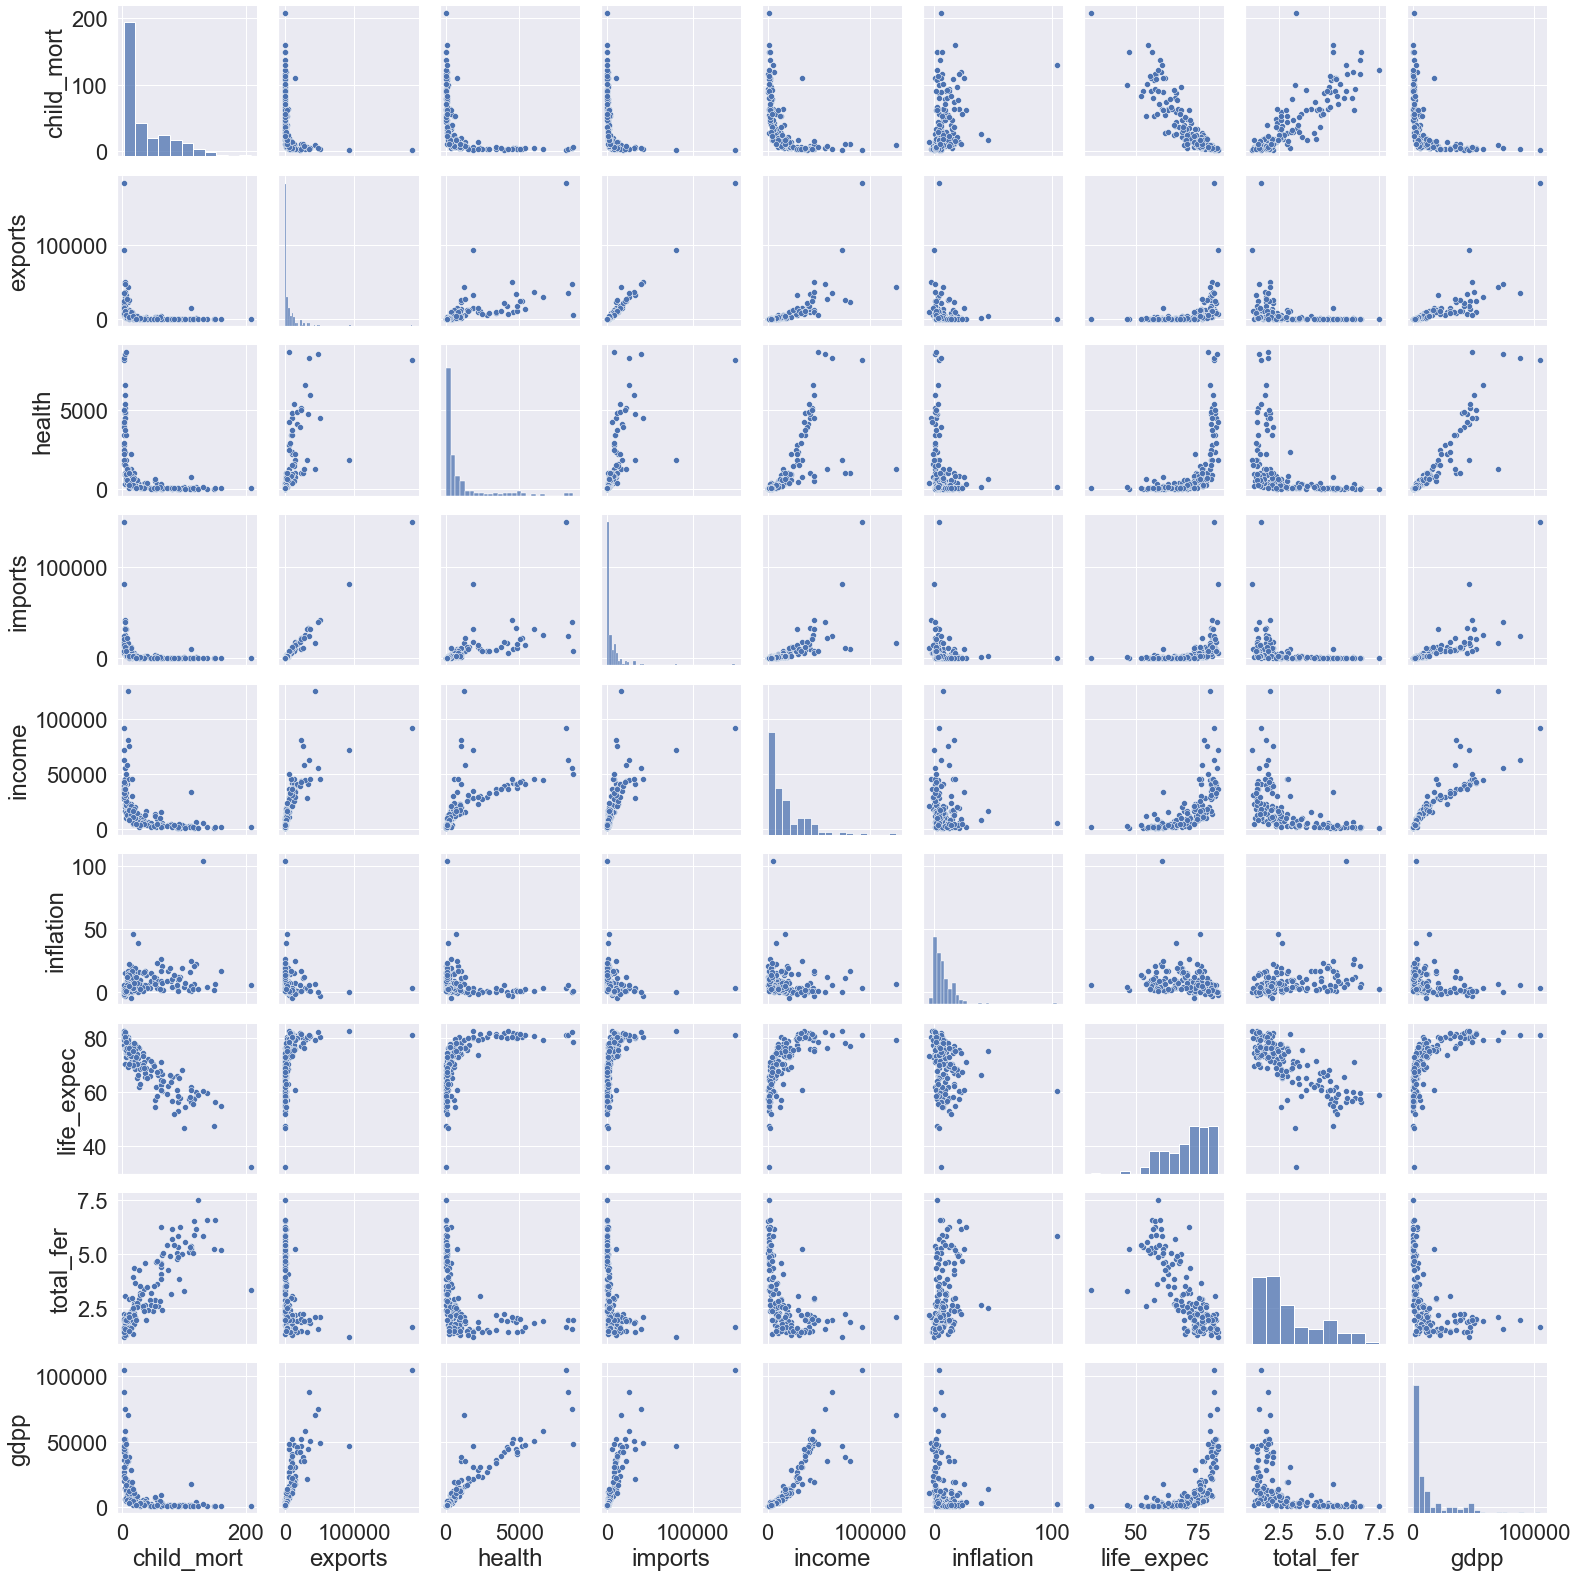

In [15]:
car_corr = numeric_df.corr() 
sns.set(font_scale=2) 
sns.pairplot(numeric_df,palette="husl") 
plt.show()

In [16]:
standard_scaler = StandardScaler()
country_numeric_array = standard_scaler.fit_transform(numeric_df)
country_numeric_array.shape

(167, 9)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [18]:
pca.fit(country_numeric_array)

PCA(random_state=42, svd_solver='randomized')

In [19]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [20]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

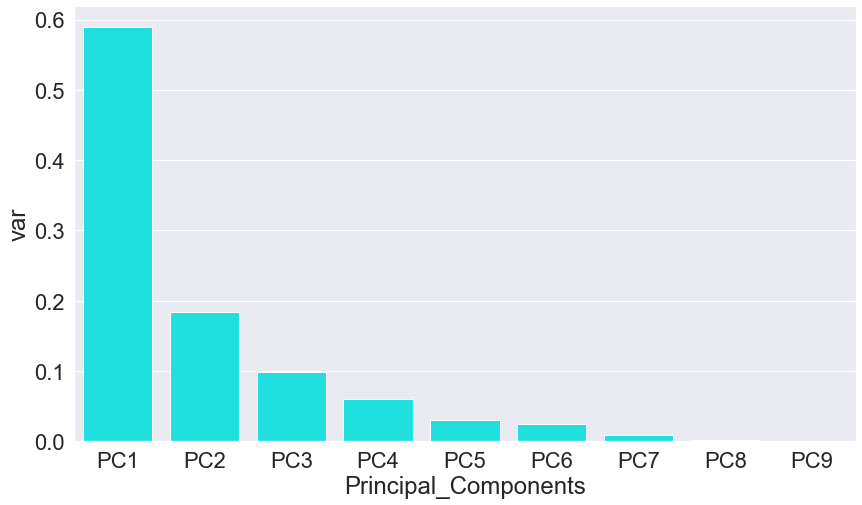

In [21]:
plt.figure(figsize=(14,8))

df_EVR = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'Principal_Components':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='Principal_Components',y="var", 
           data=df_EVR, color="cyan");

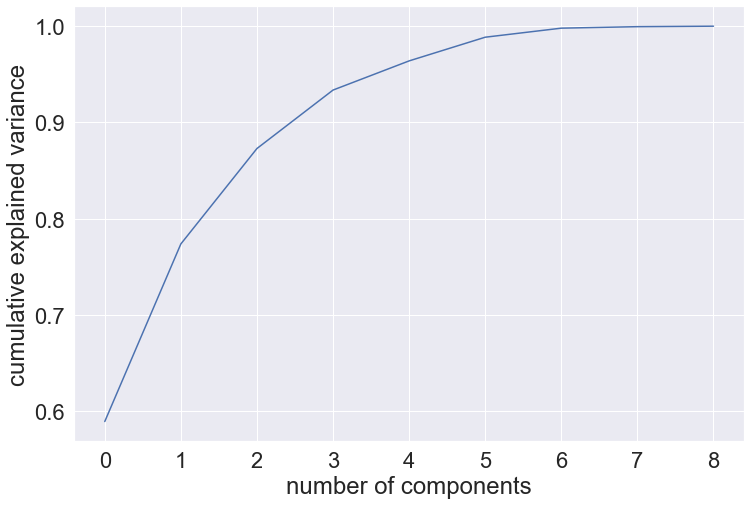

In [22]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
col_names = list(numeric_df.columns)
pca_df = pd.DataFrame({'Feature':col_names, 'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]})
pca_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444,-0.004951
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264,-0.717924
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072,-0.130346
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135,0.665687
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811,0.079011
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070,0.011281
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966,-0.031594
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293,0.023682
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022,0.128464


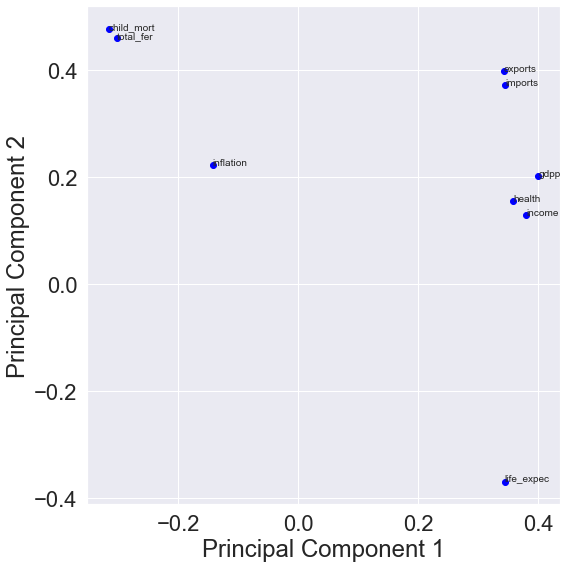

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

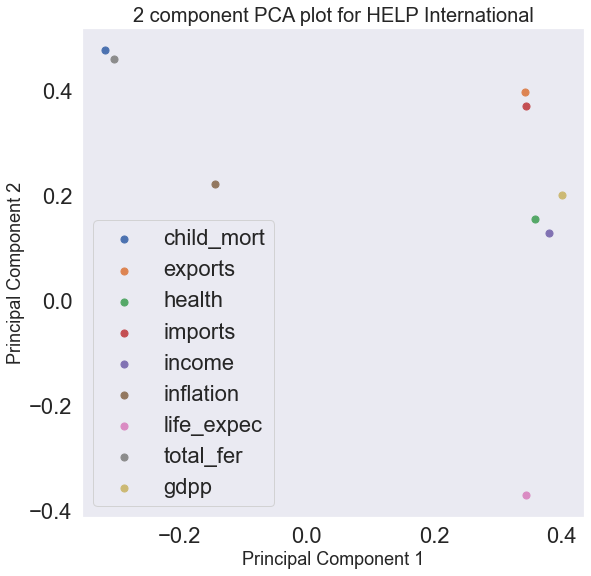

In [25]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA plot for HELP International', fontsize = 20)
targets = ['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']
#colors = ['r', 'g', 'b']
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['Feature'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2']
              
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [28]:
pca_final_fit = pca_final.fit_transform(country_numeric_array)
pca_final_fit.shape

(167, 4)

<AxesSubplot:>

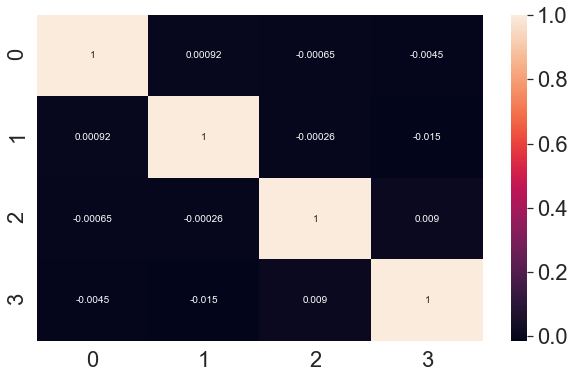

In [29]:
corrmat = np.corrcoef(pca_final_fit.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)

In [30]:
pca_df = pd.DataFrame(data = pca_final_fit, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [31]:
pca_df = pd.concat([country_df_only,pca_df],axis=1)
pca_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


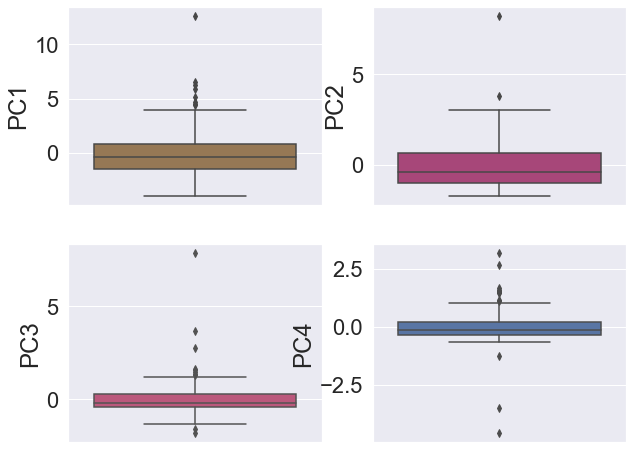

In [32]:
plt.figure(figsize=(10,8))
#plt.title("Outlier Analysis of the Data")
plt.subplot(221)
sns.boxplot(y = pca_df.PC1,palette=("cubehelix"))
plt.subplot(222)
sns.boxplot(y = pca_df.PC2,palette=("magma"))
plt.subplot(223)
sns.boxplot(y = pca_df.PC3, palette=("plasma"))
plt.subplot(224)
sns.boxplot(y = pca_df.PC4)
plt.show()

In [33]:
hier_df = pca_df
hier_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [34]:
# outlier treatment for Principal Component 1:
Q1 = pca_df.PC1.quantile(0.05)
Q3 = pca_df.PC1.quantile(0.95)
IQR = Q3 - Q1
grouped_df = pca_df[(pca_df.PC1 >= Q1 - 1.5*IQR) & (pca_df.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 2:
Q1 = pca_df.PC2.quantile(0.05)
Q3 = pca_df.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(grouped_df.PC2 >= Q1 - 1.5*IQR) & (pca_df.PC2 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 3:
Q1 = pca_df.PC3.quantile(0.05)
Q3 = pca_df.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC3 >= Q1 - 1.5*IQR) & (pca_df.PC3 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 4:
Q1 = pca_df.PC4.quantile(0.05)
Q3 = pca_df.PC4.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC4 >= Q1 - 1.5*IQR) & (pca_df.PC4 <= Q3 + 1.5*IQR)]


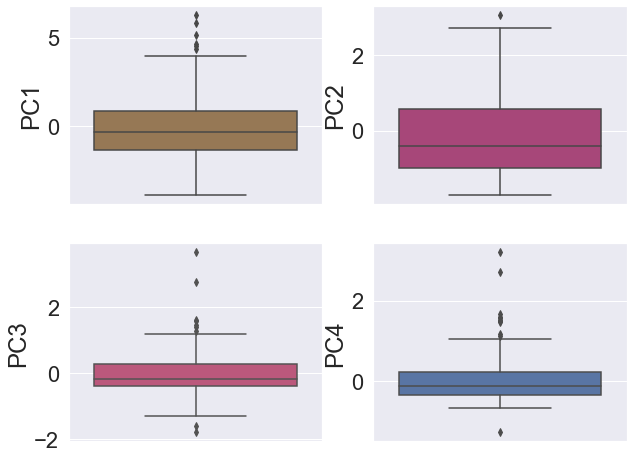

In [35]:
plt.figure(figsize=(10,8))
#plt.title("Outlier Analysis of the Data")
plt.subplot(221)
sns.boxplot(y = pca_df.PC1,palette=("cubehelix"))
plt.subplot(222)
sns.boxplot(y = pca_df.PC2,palette=("magma"))
plt.subplot(223)
sns.boxplot(y = pca_df.PC3, palette=("plasma"))
plt.subplot(224)
sns.boxplot(y = pca_df.PC4)
plt.show()

In [36]:
pca_df.shape

(164, 5)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

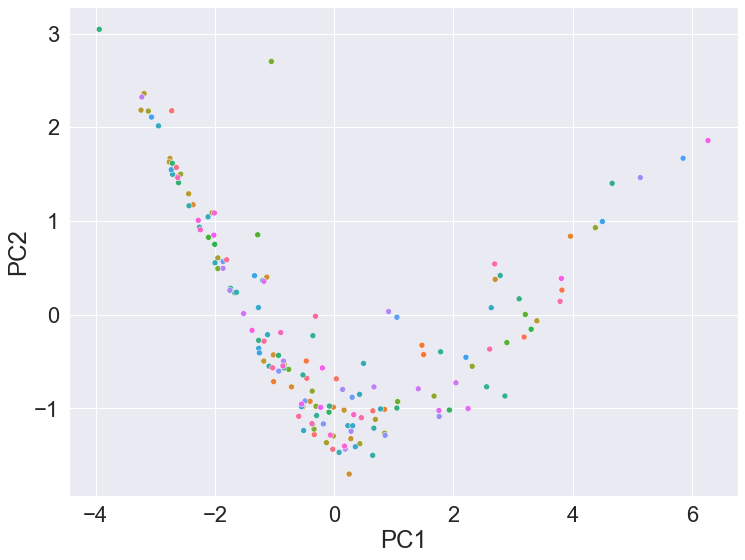

In [37]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue="country",legend=False)


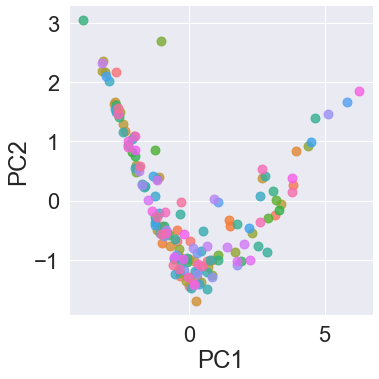

In [38]:
sns.lmplot( x="PC1", y="PC2",
  data=pca_df, 
  fit_reg=False, 
  hue='country',  # color by cluster
  legend=False,
  scatter_kws={"s": 80})

In [39]:
# Dataframe to be used for Clustering:
pca_df2 = pca_df[['PC1','PC2','PC3','PC4']]
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513
